Tugas PCD Program Konvolusi Spasial Citra

In [10]:
# use virtual environment
# venv/Scripts/activate

# install library
# pip install matplotlib opencv-python numpy scipy

# import library
import cv2                          # for image processing
import numpy as np                  # for array
import matplotlib.pyplot as plt     # for plotting

# membaca file gambar
image = cv2.imread('rrqbb.webp', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
# Fungsi untuk menghitung konvolusi
def convolve(image, kernel):
    # Mendapatkan dimensi gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung padding untuk hasil konvolusi yang sama ukuran
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Membuat gambar yang dipadding
    padded_image = np.pad(image, ((pad_height, pad_width), (pad_height, pad_width)), mode='constant')

    # Array untuk menyimpan hasil konvolusi
    output = np.zeros_like(image)

    # Melakukan konvolusi
    for i in range(image_height):
        for j in range(image_width):
            # Mengambil region dari gambar sesuai dengan ukuran kernel
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Menghitung nilai hasil konvolusi (dot product)
            output[i, j] = np.sum(region * kernel)
    
    return output

In [12]:
# Kernel Gaussian 3x3
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]])

# Kernel Sobel untuk deteksi tepi pada arah x dan y (secara horizontal maupun vertikal)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]])

# Fungsi untuk menghitung magnitude gradien Sobel
def sobel_operator(image):
    Gx = convolve(image, sobel_x)
    Gy = convolve(image, sobel_y)
    G = np.sqrt(Gx**2 + Gy**2)  # Menghitung magnitude gradien
    return G

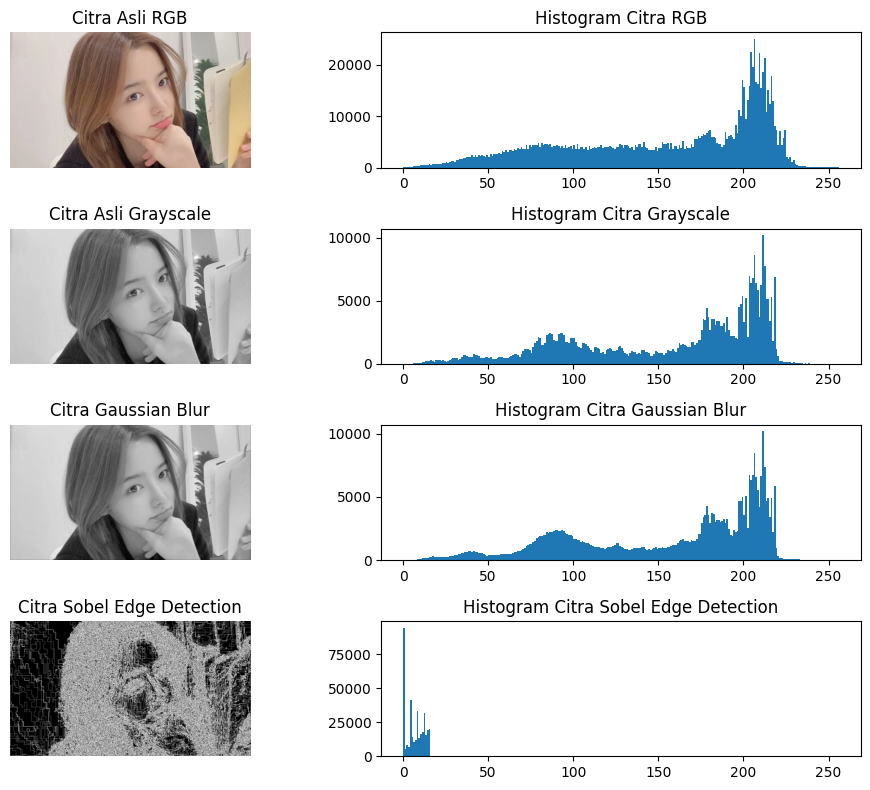

In [13]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menampilkan file gambar (Citra RGB)
plt.subplot(4, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli RGB')
plt.axis('off')

# Menampilkan histogram citra rgb
plt.subplot(4, 2, 2)
plt.hist(image_rgb.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Citra RGB')

# Mengubah citra RGB menjadi grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar grayscale
plt.subplot(4, 2, 3)
plt.imshow(image_gray, cmap='gray')
plt.title('Citra Asli Grayscale')
plt.axis('off')

# Menampilkan histogram citra gray
plt.subplot(4, 2, 4)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Citra Grayscale')

# 1. Konvolusi dengan kernel Gaussian
gaussian_blur = convolve(image_gray, gaussian_kernel)
plt.subplot(4, 2, 5)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Citra Gaussian Blur')
plt.axis('off')

# Menampilkan histogram citra gaussian
plt.subplot(4, 2, 6)
plt.hist(gaussian_blur.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Citra Gaussian Blur')

# 2. Konvolusi dengan kernel Sobel (deteksi tepi)
sobel_edge = sobel_operator(image_gray)
plt.subplot(4, 2, 7)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Citra Sobel Edge Detection')
plt.axis('off')

# Menampilkan histogram citra gaussian
plt.subplot(4, 2, 8)
plt.hist(sobel_edge.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Citra Sobel Edge Detection')

plt.tight_layout()
plt.show()
